In [1]:
# Copyright (C) 2023 Miroslav Vořechovský and Jan Mašek
# MIT licence https://en.wikipedia.org/wiki/MIT_License

from SampleTiler import strat_sample_by_tiling, get_LHS_median_sample, get_scrambled_Halton_sample
from Tools import plot_2D_view_of_tiling, plot_3D_view_of_tiling
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import FileLink, HTML
from ipywidgets import Output

Performs a sample construction using the Sample Tiling metod. 
For details see publication: 

[1] Jan Mašek & Miroslav Vořechovský: Optimal sampling in a hypercube: stratified sample tiling. Advances in Engineering Software, 2023
 

 
### Parameters
| Parameter      | Description                                                                                    | Type          |
| :-------------- |:----------------------------------------------------------------------------------------------- |:------------- |
| nv             | Dimension of the design domain                                                                  | Integer       |
| ns             | Number of points in each tile                                                                   | Integer       |
| t              | The number of strata (tiles) along each dimension                                               | Integer       |
| my_tile        | Provided point sample that will be used for tiling. If my_tile is None, random sampling will be conducted according to tile_type. | np array (ns,nv)  |
| tile_type      | Sampling method used for generation of tiles. Options: 'LH' (Latin Hypercube Sample), 'Halton' (scrambled Halton RMQC sample), 'SRS' (Simple Random Sample - default) | String        |
| median      | Triggers point positions in strata median for tile_type='LH'. | Boolean      |
| one_tile       | If True, tiling from an identical tile sample. If False, each tile is generated randomly.     | Boolean       |
| var_perms      | Triggers random variable permutations                                                          | Boolean       |
| rand_revers    | Triggers random variable reversions                                                            | Boolean       |
| t_shifts       | Triggers minor coordinate shifts to achieve regular 1D projections, see Eq. (5) in [1].                            | Boolean       |
| b_shifts       | Triggers pillar shifting, see Sec. 3.1 in [1].                                                                     | Boolean       |
| large_shifts   | Triggers large coordinate shifts for high dimension cluster removal, see Eq. (6)  in [1].                            | Boolean       |

### Returns
| Parameter      | Description                                                                         | Type         |
| :------------- |:------------------------------------------------------------------------------------|:-------------|
| Point sample   | Tiled point set. 2D numpy array of Ns coordinates in nv dimensions. (Ns = ns * t\*\*nv)                | np array (Ns,nv)  |

Feel free to explore the properties of tiled point sets for various input parameters!

/media/data10_2/DATAPART1/workspace_git/ae_crit/ipynb/SampleTiler/scatter_2D.pdf

/media/data10_2/DATAPART1/workspace_git/ae_crit/ipynb/SampleTiler/sample.txt

/media/data10_2/DATAPART1/workspace_git/ae_crit/ipynb/SampleTiler/sample.npy

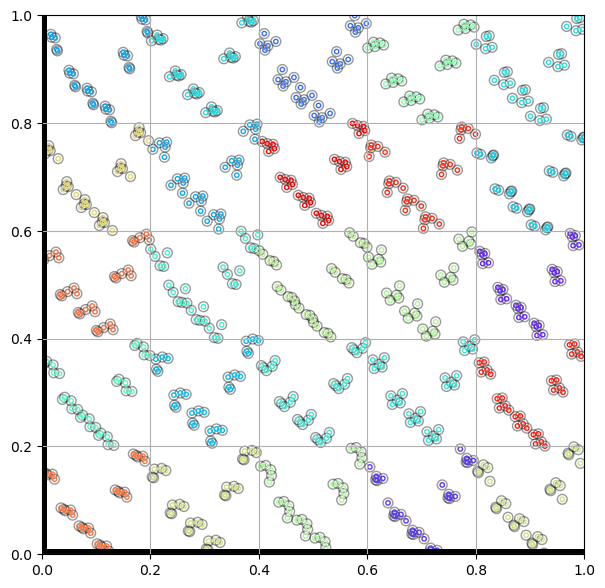

In [2]:
# The number of strata (tiles) along each dimension
t = 5

# The number of points within each tile
ns = 6

# The dimension of the design domain
nv = 3

# The total number of points within the sample
Ns = ns*t**nv

# example of supplying an own tile in the correct format, 
# to be used in strat_sample_by_tiling function as 'my_tile':
# my_tile = get_LHS_median_sample(ns, nv) #prepare own LHS-M tile
# my_tile = get_scrambled_Halton_sample(ns, nv) #prepare own Halton (scrambled) tile


# Sample tiling
x = strat_sample_by_tiling(nv, ns, t, tile_type = 'LH', median = True, my_tile = None, \
                           one_tile = True, var_perms = False, rand_revers = False, \
                           t_shifts = True, b_shifts = False, large_shifts = False)

# Display of a 2D subspace, plot variables in vars_to_plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
plot_2D_view_of_tiling(nv, ns, t, x, ax, vars_to_plot = [0,1])

# Save the 2D scatter plot to a pdf file
plt.savefig("scatter_2D.pdf",dpi = 300,bbox_inches = "tight",pad_inches = 0.01)
display(FileLink("scatter_2D.pdf"))

# Save the sample to a text file
np.savetxt('sample.txt', x, delimiter='\t')
display(FileLink('sample.txt'))

# Save the sample as binary
np.save('sample.npy' ,x)
display(FileLink('sample.npy'))

plt.show()

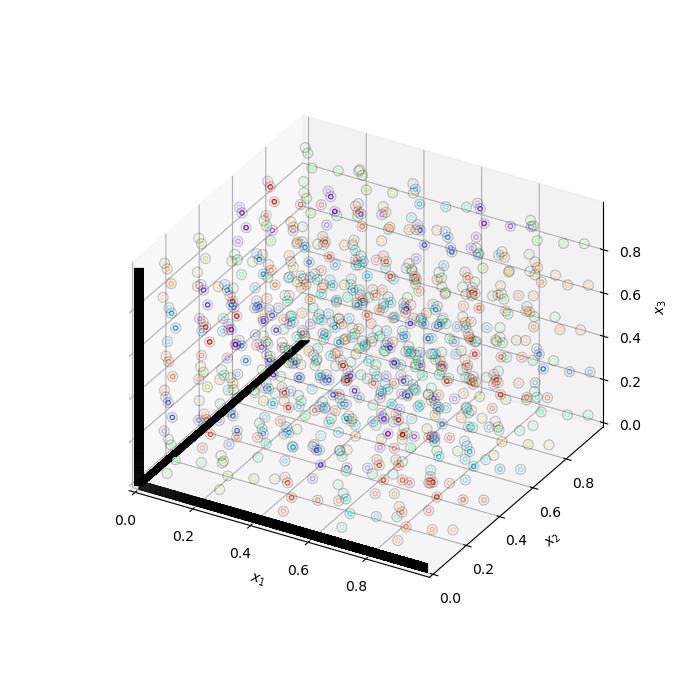

In [3]:
# Display of a 3D subspace, plot variables in vars_to_plot
if nv>2:
    from mpl_toolkits.mplot3d import Axes3D
    
    # use this for jupyter notebook:
    #%matplotlib notebook
    
    # use this for Binder:
    %matplotlib ipympl
    
    fig = plt.figure(figsize=(7, 7))
    ax3 = fig.add_subplot(projection='3d')
    plot_3D_view_of_tiling(nv, ns, t, x, ax3, vars_to_plot=[0,1,2])